# Import Important Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob #loading multiple files
import re #for text preprocessing and pattern matching
import emoji # For handling and processing emojis in text data
from camel_tools.u tils.dediac import dediac_ar  # for removing diacritics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Merging Monthly Tweet CSV Files into a Single Dataset

In [5]:
# Path to the folder containing CSV files
folder_path = 'D:/Tweets_Dataset/*.csv'  # replace with your actual path

# Read all CSV files in the folder
csv_files = glob.glob(folder_path)

# Merge all files into a single DataFrame
df_list = [pd.read_csv(file, engine='python') for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Save the merged DataFrame to a new CSV file
#merged_df.to_csv('D:/merged_output.csv', index=False)

print("All CSV files have been merged and saved as 'merged_output.csv'")

All CSV files have been merged and saved as 'merged_output.csv'


# Displaying a part of the data

In [6]:
merged_df.head()

,Unnamed: 0,tweet_id,tweet_text,created_at,lang,retweet_count,reply_count,like_count,quote_count,impression_count,...,listed_count,country,country_code,name,full_name,place_type,geo_bbox_0,geo_bbox_1,geo_bbox_2,geo_bbox_3
0,0,1520553560332713985,"ٱےهےربَ "" THQ211 ""\n\n...\n\nرياضه الاهلي الات...",2022-04-30 23:59:53+00:00,ar,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1520553556176162817,"ٱےهےربَ "" THQ211 ""\n\n...\n\nرياضه الاهلي الات...",2022-04-30 23:59:52+00:00,ar,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1520553551780622342,"ٱےهےربَ "" THQ211 ""\n\n...\n\nرياضه الاهلي الات...",2022-04-30 23:59:51+00:00,ar,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1520553548567699456,روسيا تُكثّف الضغط العسكري… والغرب يعزز تسليح ...,2022-04-30 23:59:51+00:00,ar,0.0,0.0,0.0,0.0,0.0,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1520553540514635778,"ٱےهےربَ "" THQ211 ""\n\n...\n\nرياضه الاهلي الات...",2022-04-30 23:59:49+00:00,ar,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Displaying the columns of the data

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222827 entries, 0 to 7222826
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          object 
 1   tweet_id            object 
 2   tweet_text          object 
 3   created_at          object 
 4   lang                object 
 5   retweet_count       float64
 6   reply_count         float64
 7   like_count          float64
 8   quote_count         float64
 9   impression_count    float64
 10  user_id             object 
 11  place_id            object 
 12  user_name           object 
 13  user_name_informal  object 
 14  user_location       object 
 15  profile_image_url   object 
 16  followers_count     float64
 17  following_count     float64
 18  tweet_count         float64
 19  listed_count        float64
 20  country             object 
 21  country_code        float64
 22  name                object 
 23  full_name           object 
 24  place_type          obje

# Checking for Missing Values in the Merged Dataset

In [8]:
merged_df.isnull().sum()

Unnamed: 0                  0
tweet_id                   18
tweet_text                 18
created_at                107
lang                      107
retweet_count             107
reply_count               107
like_count                107
quote_count               107
impression_count          196
user_id                   107
place_id              7174586
user_name                 120
user_name_informal        751
user_location         3885303
profile_image_url         690
followers_count           107
following_count           107
tweet_count               196
listed_count              196
country               7174687
country_code          7222827
name                  7174675
full_name             7174675
place_type            7174675
geo_bbox_0            7174675
geo_bbox_1            7174675
geo_bbox_2            7174675
geo_bbox_3            7174675
dtype: int64

# Removing Unnecessary Columns from the Merged Dataset

In [9]:
merged_df = merged_df.drop('place_id', axis=1)
merged_df = merged_df.drop('user_location', axis=1)
merged_df = merged_df.drop('tweet_id', axis=1)
merged_df = merged_df.drop('user_id', axis=1)
merged_df = merged_df.drop('user_name', axis=1)
merged_df = merged_df.drop('user_name_informal', axis=1)
merged_df = merged_df.drop('profile_image_url', axis=1)
merged_df = merged_df.iloc[:, :-9]

# Display the updated DataFrame
merged_df.isnull().sum()

Unnamed: 0            0
tweet_text           18
created_at          107
lang                107
retweet_count       107
reply_count         107
like_count          107
quote_count         107
impression_count    196
followers_count     107
following_count     107
tweet_count         196
listed_count        196
dtype: int64

# Filtering Arabic Tweets and Handling Missing Data

-Drops rows with missing values to ensure the dataset is clean.

-Filters the dataset to retain only tweets in Arabic (lang == 'ar'), ensuring language consistency.

-Removes the lang column after filtering, as it is no longer needed.

-downsampling was applied by removing non-Arabic tweets from the dataset. This step reduced the overall number of samples while ensuring that the remaining data exclusively consisted of Arabic-language tweets.

In [10]:
merged_df = merged_df.dropna()

# Drop rows where `lang` is not "ar"
merged_df = merged_df[merged_df['lang'] == 'ar']
merged_df = merged_df.drop('lang', axis=1)

# Display the updated DataFrame
merged_df.isnull().sum()

Unnamed: 0          0
tweet_text          0
created_at          0
retweet_count       0
reply_count         0
like_count          0
quote_count         0
impression_count    0
followers_count     0
following_count     0
tweet_count         0
listed_count        0
dtype: int64

# Displaying the columns of the data

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7222605 entries, 0 to 7222826
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        object 
 1   tweet_text        object 
 2   created_at        object 
 3   retweet_count     float64
 4   reply_count       float64
 5   like_count        float64
 6   quote_count       float64
 7   impression_count  float64
 8   followers_count   float64
 9   following_count   float64
 10  tweet_count       float64
 11  listed_count      float64
dtypes: float64(9), object(3)
memory usage: 716.4+ MB


# Save the merged DataFrame to a new CSV file

In [45]:
merged_df.to_csv('D:/merged_filtered.csv', index=False)

# Normalization Using Min-Max Scaling

Normalization scales the numeric features to a range of 0 to 1. This helps models like neural networks perform better by making
sure no feature is too large or small compared to others, which helps the model learn more effectively.
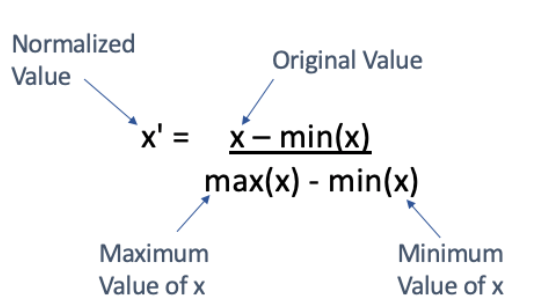

In [12]:
# Min-Max Normalization
columns_to_normalize = [
    'retweet_count', 'reply_count', 'like_count', 'quote_count', 
    'impression_count', 'followers_count', 'following_count', 
    'tweet_count', 'listed_count'
]

# Apply Min-Max normalization
merged_df[columns_to_normalize] = merged_df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print(merged_df[columns_to_normalize].head())


   retweet_count  reply_count  like_count  quote_count  impression_count  \
0            0.0          0.0         0.0          0.0               0.0   
1            0.0          0.0         0.0          0.0               0.0   
2            0.0          0.0         0.0          0.0               0.0   
3            0.0          0.0         0.0          0.0               0.0   
4            0.0          0.0         0.0          0.0               0.0   

   followers_count  following_count  tweet_count  listed_count  
0     1.347773e-07     1.110426e-05     0.001857      0.000000  
1     8.985152e-08     4.441704e-07     0.003653      0.000000  
2     4.492576e-08     2.665023e-06     0.002054      0.000000  
3     8.091130e-05     8.883409e-07     0.174982      0.000536  
4     4.492576e-08     8.883409e-07     0.003278      0.000000  


# Tweet Preprocessing for Text Cleaning and Normalization

-Remove usernames: Eliminates user mentions to focus on the content of the tweet.

-Remove links: Removes URLs that aren't relevant to sentiment analysis.

-Remove emojis: Strips emojis which could interfere with text processing.

-Remove special characters: Cleans up hashtags, underscores, and hyphens, leaving only meaningful text.

-Remove non-Arabic characters: Ensures only Arabic text remains for analysis.

-Remove punctuation: Removes unnecessary punctuation that doesn't contribute to the sentiment.

-Remove diacritics: Standardizes text by removing diacritics for consistency in analysis.

-Remove elongations: Reduces repeated characters to a standard form for cleaner text.

-Normalize Alef forms: Unifies different forms of the letter Alef for consistency.

-Strip extra spaces: Eliminates excessive whitespace for cleaner text.

In [13]:
def preprocess_tweet(tweet):
    # Step 1: Remove usernames (words starting with '@')
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Step 2: Remove links (text starting with 'www.' or 'http')
    tweet = re.sub(r'http\S+|www\.\S+', '', tweet)
    
    # Step 3: Remove emojis
    tweet = ''.join(char for char in tweet if not emoji.is_emoji(char))
    
    # Step 4: Remove hashtags’ octothorpe (#), underscores (_), and hyphens (-)
    tweet = re.sub(r'[#_\-]', '', tweet)
    
    # Step 5: Remove non-Arabic characters and words
    tweet = re.sub(r'[^\u0600-\u06FF\s]', '', tweet)
    
    # Step 6: Remove punctuation marks
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Step 7: Remove diacritics
    tweet = dediac_ar(tweet)
    
    # Step 8: Remove elongations (repeated characters more than twice)
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    
    # Step 9: Normalize different forms of Alef to a single form
    tweet = re.sub(r'[إآأ]', 'ا', tweet)
    
    # Step 10: Strip extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

# Apply the function to your dataset as before
merged_df['tweet_text'] = merged_df['tweet_text'].apply(preprocess_tweet)
print(merged_df.head())

  Unnamed: 0                                         tweet_text  \
0          0  ٱےهےرب رياضه الاهلي الاتحاد الهلال النصر اوكرا...   
1          1  ٱےهےرب رياضه الاهلي الاتحاد الهلال النصر اوكرا...   
2          2  ٱےهےرب رياضه الاهلي الاتحاد الهلال النصر اوكرا...   
3          3  روسيا تكثف الضغط العسكري والغرب يعزز تسليح اوك...   
4          4  ٱےهےرب رياضه الاهلي الاتحاد الهلال النصر اوكرا...   

                  created_at  retweet_count  reply_count  like_count  \
0  2022-04-30 23:59:53+00:00            0.0          0.0         0.0   
1  2022-04-30 23:59:52+00:00            0.0          0.0         0.0   
2  2022-04-30 23:59:51+00:00            0.0          0.0         0.0   
3  2022-04-30 23:59:51+00:00            0.0          0.0         0.0   
4  2022-04-30 23:59:49+00:00            0.0          0.0         0.0   

   quote_count  impression_count  followers_count  following_count  \
0          0.0               0.0     1.347773e-07     1.110426e-05   
1          0.0          

# Save Preprocessed DataFrame to CSV

In [14]:
merged_df.to_csv('D:/merged_output_after_preprocess_tweet.csv', index=False)

# Split Dataset into Training and Testing Sets

In [15]:
# Example: Using all other columns except 'like_count' as features
#X = merged_df[numeric_columns].drop(columns=['like_count'])
#y = merged_df['like_count']

# Split the dataset
train, test = train_test_split(merged_df, test_size=0.2, random_state=42, shuffle=True)

print("Training set size:", train.shape)
print("Testing set size:", test.shape)

Training set size: (5778084, 12)
Testing set size: (1444521, 12)


# Data visualizations:

## - Visualize Distributions of Numeric Features in the Training Set using histograms

**insight**:The histograms show that all numeric features are highly skewed towards zero, indicating low engagement and activity for most tweets and users. Engagement metrics (retweets, replies, likes, quotes) and user statistics (followers, following, listed counts) have most values near zero, with only a few outliers showing high interaction. This suggests that a small number of tweets and users receive most of the visibility and engagement, a common trend in social media platforms.

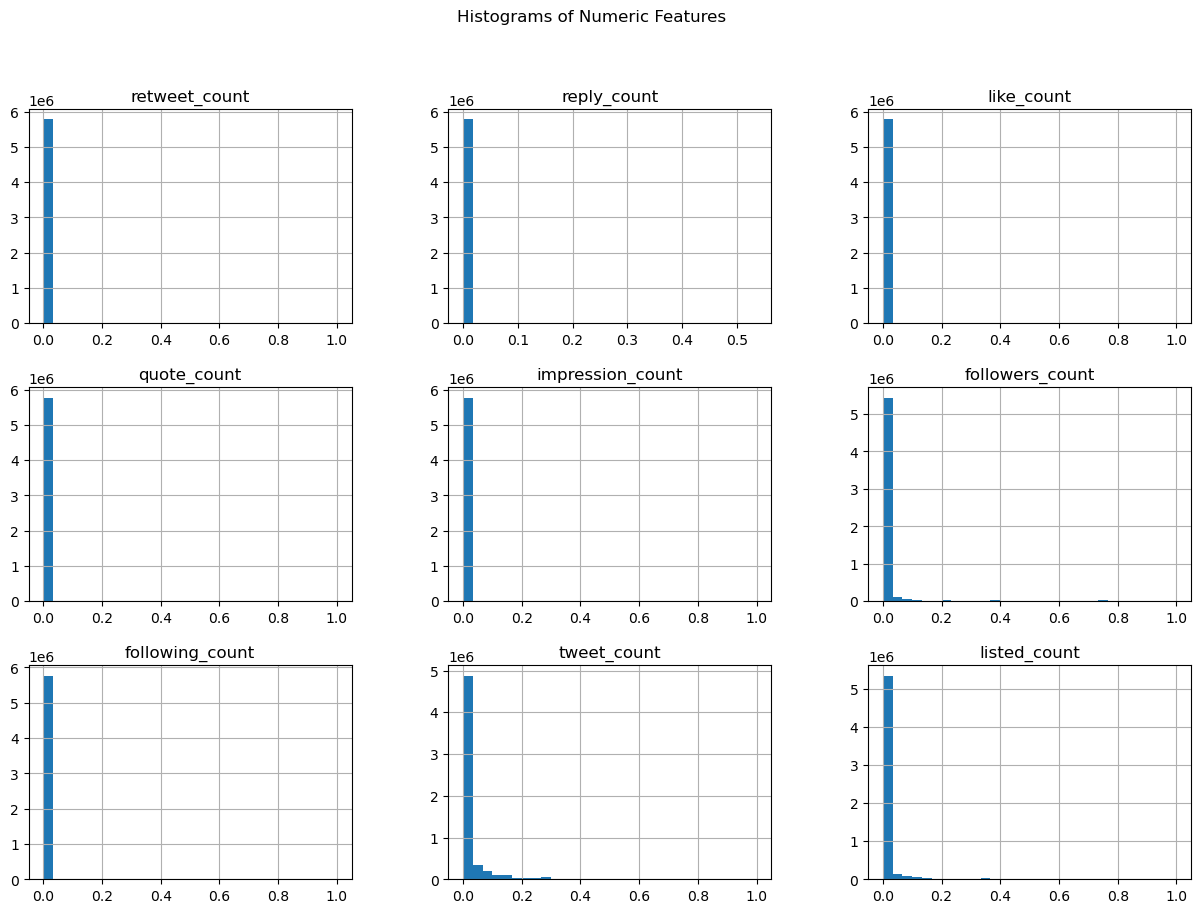

In [16]:
numeric_columns = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 
                   'impression_count', 'followers_count', 'following_count', 
                   'tweet_count', 'listed_count']

train[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box Plots for Numeric Features in the Training Data

**insight**:The box plots confirm that all numeric features are highly skewed, with most values near zero and many high outliers. This indicates that while the majority of tweets have low engagement, a few tweets receive significant interaction. The compressed boxes and long tails show a disparity between typical low-engagement tweets and rare, high-engagement ones.

<Figure size 1500x800 with 0 Axes>

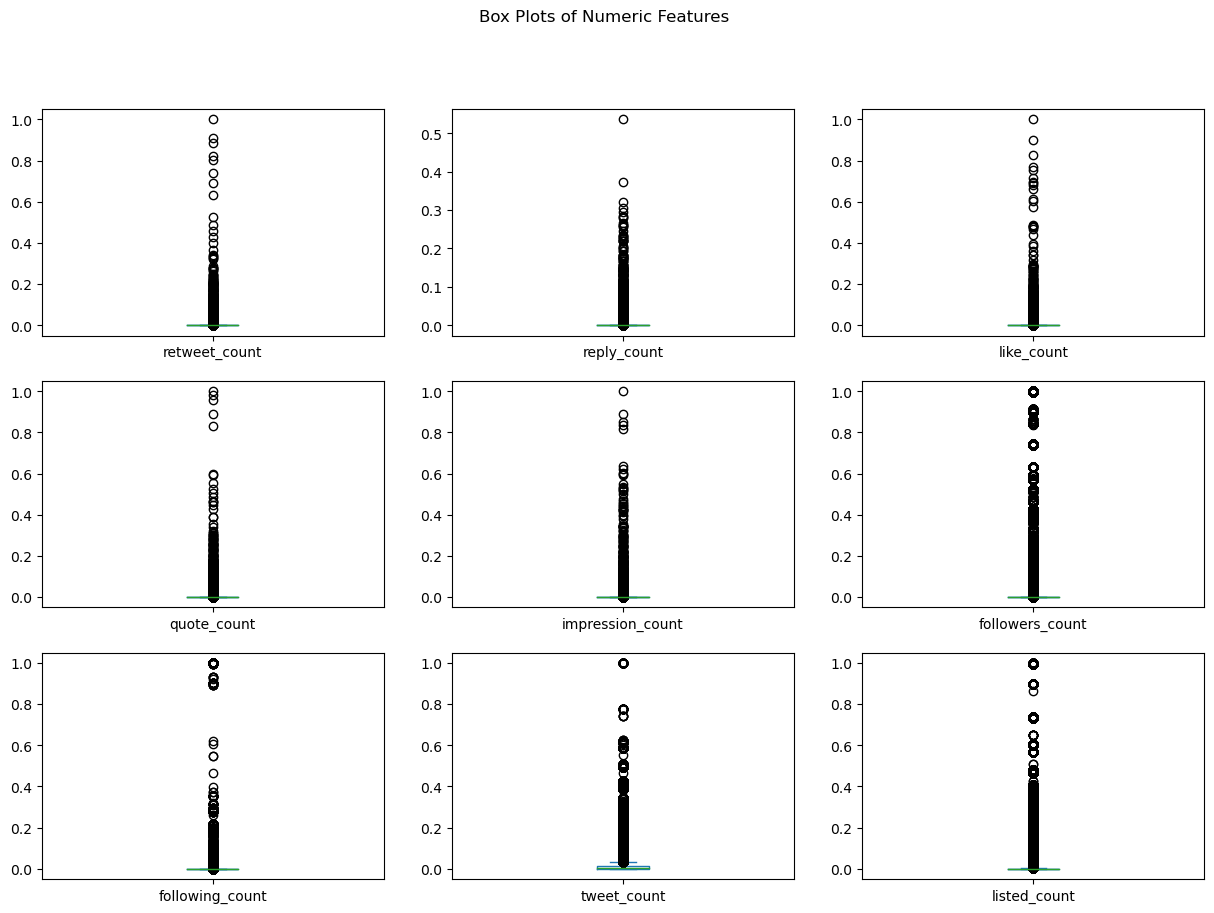

In [17]:
plt.figure(figsize=(15, 8))
train[numeric_columns].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Box Plots of Numeric Features')
plt.show()

# Scatter Plot of Like Count vs. Retweet Count in the Training Data

**insight**:The scatter plot shows a positive correlation between like count and retweet count, meaning tweets with more likes tend to have more retweets. Most data points are clustered in the lower left, indicating that the majority of tweets have low engagement. However, a few outliers in the top right suggest that some tweets receive both high likes and retweets.

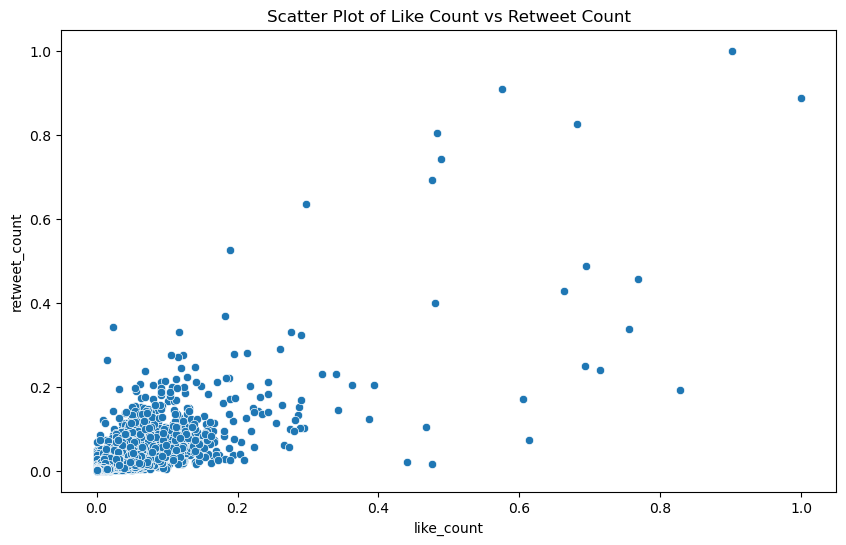

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='like_count', y='retweet_count')
plt.title('Scatter Plot of Like Count vs Retweet Count')
plt.show()

# Correlation Heatmap of Numeric Features in the Training Data

1.Strong correlations:
   - Likes and retweets(0.79): Popular tweets tend to receive both likes and retweets.
   - Followers and listed count(0.95): Influential users with more followers are frequently listed.

2.Moderate correlations:
   - Likes and replies(0.62): Tweets with high likes also tend to get more replies.
   - Replies and quotes(0.57): Tweets with many replies often have more quotes.

3.Weak correlations:
   - Following count: Has little impact on engagement.
   - Impression count: Shows weak links with engagement metrics, meaning impressions alone don't predict engagement well.

-likes, retweets, and replies are interrelated, while impressions and following count have minimal impact on engagement.

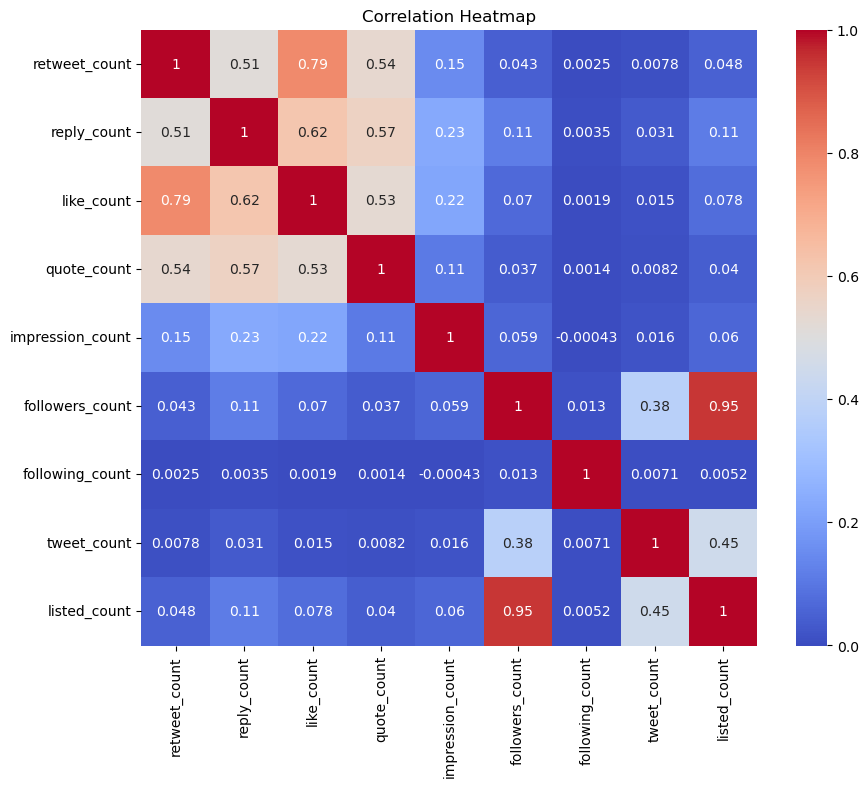

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train[numeric_columns].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
train = train.drop('listed_count', axis=1)
test = test.drop('listed_count', axis=1)

In [23]:
numeric_columns = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 
                   'impression_count', 'followers_count', 'following_count', 
                   'tweet_count']

# Summary Statistics of Numeric Features in the Training Data

In [24]:
summary = train[numeric_columns].describe()
print(summary)

       retweet_count   reply_count    like_count   quote_count  \
count   5.778084e+06  5.778084e+06  5.778084e+06  5.778084e+06   
mean    1.188603e-04  1.426201e-04  2.058646e-04  6.035776e-05   
std     1.801277e-03  1.367153e-03  2.241878e-03  1.689173e-03   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%     0.000000e+00  0.000000e+00  4.655710e-05  0.000000e+00   
max     1.000000e+00  5.358588e-01  1.000000e+00  1.000000e+00   

       impression_count  followers_count  following_count   tweet_count  
count      5.778084e+06     5.778084e+06     5.778084e+06  5.778084e+06  
mean       6.552316e-05     1.430063e-02     7.384125e-04  2.189222e-02  
std        1.929098e-03     8.168886e-02     1.672942e-02  5.013177e-02  
min        0.000000e+00     0.000000e+00     0.000000e+00  0.000000e+00  
25%        0.000000e+00     4.94183

# Statistics for each Numeric Feature

In [25]:
for column in numeric_columns:
    print(f"--- {column} ---")
    print(f"Mean: {train[column].mean()}")
    print(f"Median: {train[column].median()}")
    print(f"Mode: {train[column].mode()[0]}")
    print(f"Standard Deviation: {train[column].std()}")
    print()

--- retweet_count ---
Mean: 0.00011886027044252239
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0018012766844819387

--- reply_count ---
Mean: 0.00014262012634270346
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0013671529499042433

--- like_count ---
Mean: 0.0002058645766840164
Median: 0.0
Mode: 0.0
Standard Deviation: 0.002241878344510923

--- quote_count ---
Mean: 6.03577624765235e-05
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0016891730139459145

--- impression_count ---
Mean: 6.552316350344414e-05
Median: 0.0
Mode: 0.0
Standard Deviation: 0.001929098106039014

--- followers_count ---
Mean: 0.014300626006062389
Median: 1.9452854546918307e-05
Mode: 4.492576107833328e-08
Standard Deviation: 0.08168885991453938

--- following_count ---
Mean: 0.0007384125354276969
Median: 4.4861214504119236e-05
Mode: 4.4417044063484394e-07
Standard Deviation: 0.01672942416709049

--- tweet_count ---
Mean: 0.021892223335662063
Median: 0.003834563696142914
Mode: 0.003770083863509335
Standard Deviation: 0.0

# Detecting Outliers in Numeric Features

Outliers are detected using the Interquartile Range (IQR) method:

IQR = Q3 - Q1 (the range between the 75th percentile and 25th percentile).
Any value outside the range of:
Lower bound: Q1 - 1.5 × IQR
Upper bound: Q3 + 1.5 × IQR
is considered an outlier.

In [27]:
outliers = {}
for column in numeric_columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = train[(train[column] < (Q1 - 1.5 * IQR)) | (train[column] > (Q3 + 1.5 * IQR))]

print("Outliers detected in each column:")
for column, outliers_df in outliers.items():
    print(f"{column}: {len(outliers_df)} outliers")

Outliers detected in each column:
retweet_count: 1033653 outliers
reply_count: 1380701 outliers
like_count: 814794 outliers
quote_count: 243129 outliers
impression_count: 849911 outliers
followers_count: 1122300 outliers
following_count: 754518 outliers
tweet_count: 915354 outliers


# Saving the train and test data

In [28]:
train.to_csv('D:/merged_train.csv', index=False)

In [29]:
test.to_csv('D:/merged_test.csv', index=False)

# future model selection

Based on the data exploration we have done we are planning to use **Mazajak** and **AraBERT**, along with additional models such as **ARABERTv2**, **XLM-R**, and **FastText**, for sentiment analysis. These models offer a diverse combination of transformer-based and efficient LSTM architectures, providing complementary strengths in handling both complex and resource-constrained scenarios. we will apply **majority voting** to aggregate their predictions, ensuring a robust and balanced approach to sentiment detection.
    